# Convolutional Neural Network Architecture

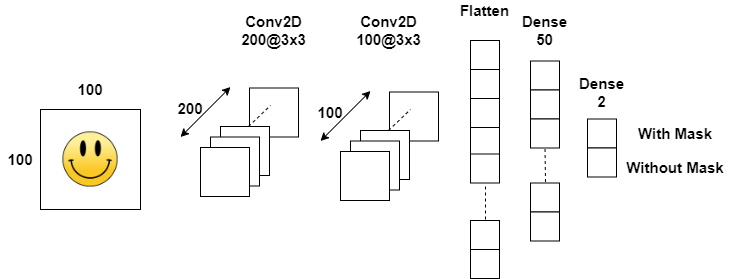

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.6705 - accuracy: 0.5697

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


31/31 [==============================] - 38s 1s/step - loss: 0.6705 - accuracy: 0.5697 - val_loss: 0.6365 - val_accuracy: 0.5806
Epoch 2/20
31/31 [==============================] - ETA: 0s - loss: 0.5112 - accuracy: 0.7475

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


31/31 [==============================] - 35s 1s/step - loss: 0.5112 - accuracy: 0.7475 - val_loss: 0.3939 - val_accuracy: 0.8589
Epoch 3/20
31/31 [==============================] - ETA: 0s - loss: 0.3120 - accuracy: 0.8636

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


31/31 [==============================] - 34s 1s/step - loss: 0.3120 - accuracy: 0.8636 - val_loss: 0.2093 - val_accuracy: 0.9274
Epoch 4/20
31/31 [==============================] - ETA: 0s - loss: 0.2088 - accuracy: 0.9303

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


31/31 [==============================] - 33s 1s/step - loss: 0.2088 - accuracy: 0.9303 - val_loss: 0.1587 - val_accuracy: 0.9516
Epoch 5/20
31/31 [==============================] - 32s 1s/step - loss: 0.1793 - accuracy: 0.9273 - val_loss: 0.1700 - val_accuracy: 0.9435
Epoch 6/20
31/31 [==============================] - ETA: 0s - loss: 0.1432 - accuracy: 0.9455

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


31/31 [==============================] - 33s 1s/step - loss: 0.1432 - accuracy: 0.9455 - val_loss: 0.1296 - val_accuracy: 0.9637
Epoch 7/20
31/31 [==============================] - 32s 1s/step - loss: 0.0959 - accuracy: 0.9646 - val_loss: 0.1303 - val_accuracy: 0.9677
Epoch 8/20
31/31 [==============================] - ETA: 0s - loss: 0.0632 - accuracy: 0.9788

INFO:tensorflow:Assets written to: model-008.model\assets


INFO:tensorflow:Assets written to: model-008.model\assets


31/31 [==============================] - 33s 1s/step - loss: 0.0632 - accuracy: 0.9788 - val_loss: 0.1044 - val_accuracy: 0.9637
Epoch 9/20
31/31 [==============================] - 31s 1s/step - loss: 0.0452 - accuracy: 0.9869 - val_loss: 0.1134 - val_accuracy: 0.9677
Epoch 10/20
31/31 [==============================] - 31s 1s/step - loss: 0.0434 - accuracy: 0.9828 - val_loss: 0.1618 - val_accuracy: 0.9516
Epoch 11/20
31/31 [==============================] - 31s 1s/step - loss: 0.0461 - accuracy: 0.9838 - val_loss: 0.1178 - val_accuracy: 0.9718
Epoch 12/20
31/31 [==============================] - 31s 998ms/step - loss: 0.0441 - accuracy: 0.9828 - val_loss: 0.1515 - val_accuracy: 0.9637
Epoch 13/20
31/31 [==============================] - 31s 1s/step - loss: 0.0310 - accuracy: 0.9879 - val_loss: 0.1128 - val_accuracy: 0.9677
Epoch 14/20
31/31 [==============================] - 31s 1s/step - loss: 0.0177 - accuracy: 0.9960 - val_loss: 0.1830 - val_accuracy: 0.9516
Epoch 15/20
31/31 [====

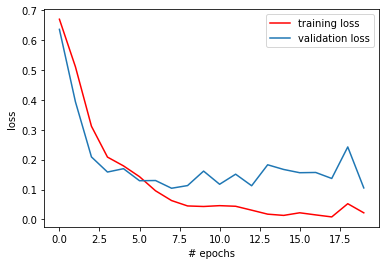

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

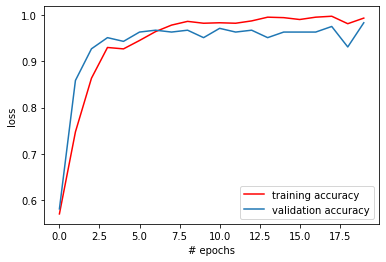

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 204ms/step - loss: 0.0726 - accuracy: 0.9783
[0.07258199155330658, 0.97826087474823]
